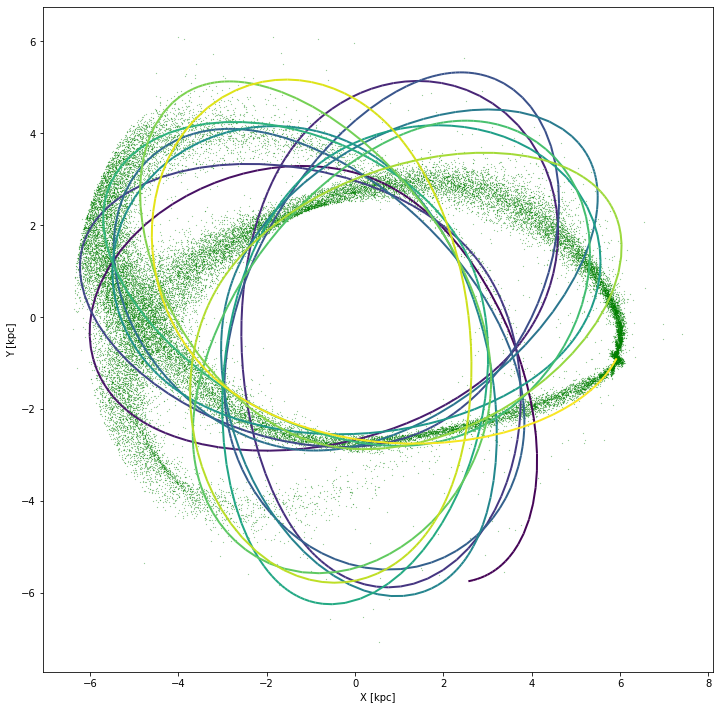

In [25]:
from IPython.display import display, Math, HTML, Image
import orbits
import gaia
import numpy as np
from astropy.visualization import quantity_support
quantity_support()  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib.collections import LineCollection
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

nbody = np.loadtxt('2023-10-17/ngc6397.nbform')
orbit = np.loadtxt('NGC6397.orb_bv15')

fig, ax = plt.subplots(ncols=1)

ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.scatter(nbody[:,1] / 1000, nbody[:,2] / 1000, color='g', marker='.', s=0.1)


# Create a continuous norm to map from data points to colors
points = orbit[:,1:3].reshape(-1, 1, 2) / 1000


segments = np.concatenate([points[:-1], points[1:]], axis=1)[len(orbit)//2:]
t = np.linspace(0, 1, len(segments))
norm = plt.Normalize(t.min(), t.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(t)
lc.set_linewidth(2)
line = ax.add_collection(lc)
#fig.colorbar(line, ax=axs[0])

#ax.plot(orbit[:,1], orbit[:,2], c=t, cmap='inferno')

#ax.set_xlim(points[:,1].min(), points[:,1].max())
#ax.set_ylim(points[:,2].min(), points[:,2].max())

